In [94]:
import mxnet
import gluoncv as gcv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

(452, 678, 3)

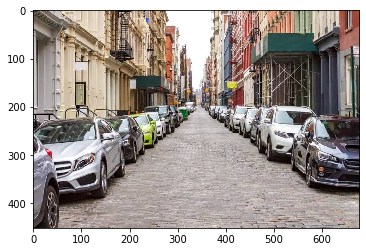

In [95]:
image= mxnet.image.imread('street.jpeg')
plt.imshow(image.asnumpy())
image.shape

(1, 3, 480, 480)

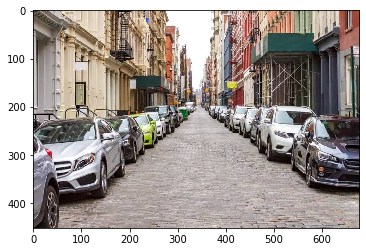

In [96]:
from mxnet.gluon.data.vision import transforms
image= mxnet.image.imread('street.jpeg')
plt.imshow(image.asnumpy())
image.shape
transform_fn= transforms.Compose([
    transforms.Resize((480, 480), keep_ratio= False),
    transforms.ToTensor(),
    transforms.Normalize([.485, .456, .406], [.229, .224, .225])
])
# url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/segmentation/voc_examples/1.jpg'
# filename = 'example.jpg'
# gcv.utils.download(url, filename)
# input_img = mxnet.image.imread(filename, )
# input_img.asnumpy().shape
image= transform_fn(image, )
image= image.expand_dims(0)
image.shape

In [97]:
network= gcv.model_zoo.get_model('fcn_resnet50_ade', pretrained=True)


In [98]:
prediction= network(image)

In [99]:
output= prediction[0]
output.shape

(1, 150, 480, 480)

In [100]:
output[0]


[[[ 3.8607163   3.8277798   3.7948432  ...  2.0654652   2.044459
    2.0234523 ]
  [ 3.861284    3.8301606   3.7990377  ...  2.147537    2.1277933
    2.108049  ]
  [ 3.8618517   3.832542    3.8032327  ...  2.2296088   2.2111275
    2.1926455 ]
  ...
  [ 1.2455854   1.2278833   1.2101814  ... -0.06635759  0.0320219
    0.1304044 ]
  [ 1.1961238   1.1632291   1.1303345  ... -0.01532512  0.08727574
    0.18987978]
  [ 1.1466606   1.0985729   1.0504853  ...  0.03570892  0.1425313
    0.24935699]]

 [[ 9.561418    9.719442    9.877467   ...  9.171654    9.092613
    9.013569  ]
  [ 9.665998    9.824409    9.982819   ...  9.264491    9.189968
    9.115441  ]
  [ 9.77058     9.929377   10.088171   ...  9.357328    9.287323
    9.217315  ]
  ...
  [ 0.9891067   1.032685    1.0762634  ...  2.597594    2.6211927
    2.6447926 ]
  [ 0.97586316  1.0129374   1.0500116  ...  2.6397448   2.6694453
    2.6991467 ]
  [ 0.9626191   0.9931891   1.0237591  ...  2.6818967   2.717699
    2.7535026 ]]

 [[

In [101]:
test_pixel_x, test_pixel_y = 100, 200
detected= output[0][:, test_pixel_x, test_pixel_y]
idx= np.argmax(detected.asnumpy())

from gluoncv.data.ade20k.segmentation import ADE20KSegmentation
class_label= ADE20KSegmentation.CLASSES[idx]
print(class_label)

building, edifice


In [102]:
# out_proba= mxnet.nd.softmax(detected)
# out_proba= mxnet.nd.argmax(out_proba)
predict = mxnet.nd.squeeze(mxnet.nd.argmax(prediction[0], 1)).asnumpy()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(480, 480, 3)
(480, 480, 3)


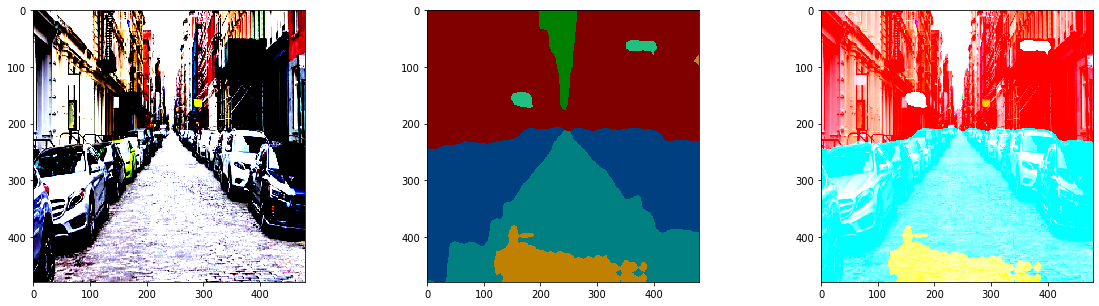

In [103]:
from gluoncv.utils.viz import get_color_pallete
original= mxnet.image.imread('street.jpeg')
original= transform_fn(original)
predimage= get_color_pallete(predict, 'ade20k ')
mask = np.array(predimage.convert('RGB'), dtype=np.int)
combined= original.asnumpy().transpose(1,2,0)  + mask
plt.figure(figsize= (20, 5))
plt.subplot(1, 3, 1)
plt.imshow(original.asnumpy().transpose(1, 2, 0))
plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.subplot(1, 3, 3)
plt.imshow(combined/2)
# plt.show()
print(np.shape(mask))
print(np.shape(combined))
